In [1]:
import ROOT
from draw_funcs import draw_chi2_gaussian_sim
from ROOT import TFile
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
entry = 6
nevents = 1000000
mfield = 1.3
input_path = '/var/kinfit/data/tr_ph_run021142.root'
output_path = 'kinfit_gaussian_fit_etapipi_etato2gamma_run021142.root'

In [3]:
# ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/gaussgen/share/gaussgen/rootlogon.C")')

In [4]:
# ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/kfcmd/share/kfcmd/rootlogon.C")')

In [5]:
# ROOT.gInterpreter.ProcessLine('.L TrPh.C++')

In [6]:
# ROOT.gInterpreter.ProcessLine('TFile fl("{}", "read")'.format(input_path))

In [7]:
# ROOT.gInterpreter.ProcessLine('TrPh a(tr_ph)')

In [8]:
# ROOT.gInterpreter.ProcessLine('a.setNEvents({})'.format(nevents))

In [9]:
# ROOT.gInterpreter.ProcessLine('a.setEntry({})'.format(entry))

In [10]:
# ROOT.gInterpreter.ProcessLine('a.Loop("{output_path}", {mfield})'.format(output_path=output_path, mfield=mfield))

In [11]:
# ROOT.gInterpreter.ProcessLine('fl.Close()')

In [12]:
fl = TFile.Open(output_path, 'read')

In [13]:
ROOT.gInterpreter.ProcessLine('''double fcn(double *x, double *p) {
                                        return 0.1875 * p[0] * ROOT::Math::chisquared_pdf(x[0], p[1]);}''')

0

In [14]:
ROOT.gInterpreter.ProcessLine('TF1 f0("f0", fcn, 0, 24, 2)')

140255069683744

(TF1 &) Name: f0 Title: f0


In [15]:
ROOT.gInterpreter.ProcessLine('f0.SetNpx(10000)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(0, 1.e+6)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(1, 2)')

0

In [16]:
ROOT.gInterpreter.ProcessLine('kf_chi2->Fit(&f0)')

94099471267760

 FCN=180.773 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=2.86468e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.97930e+05   9.98043e+02   6.47481e+00   1.92755e-07
   2  p1           3.00966e+00   2.05330e-03   1.35169e-05   6.89159e-02
(TFitResultPtr) <nullptr TFitResult>


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


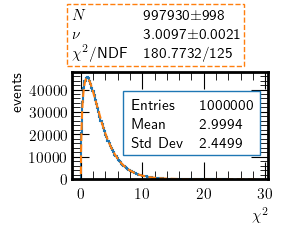

In [17]:
draw_chi2_gaussian_sim("kf_chi2", "f0", xlabel=r'$\chi^2$',
                       ylabel='events',
                      fraction=0.47,
                       info_coords=(0.3, 0.3),
                       dh=0.8, dw=-0.3,
                      h_y=10000, h_x=10)
plt.savefig('kf_chi2_gsim_etapipi_vertex_constraints.eps', bbox_inches='tight')

In [18]:
# fl.Close()